# Empirical Distribution Predictors

We may be losing a lot of information in the annotations by condensing them into a single number. Instead, we can train a model to predict the empirical distribution formed by the annotations over the answer choices. We do this by minimizing the cross-entropy between the predicted distributions and the empirical distributions. This is essentially softmax classification, but off-the-shelf implementations don't let you pass a distribution as a training label, so we have to roll our own in TensorFlow.

In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

from ngram import *
from baselines import *
from baselines import map_aggression_score_to_3class
from error_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
d_b, d_r =load_cf_data()
d_br = pd.concat([d_b, d_r])

In [4]:
max_features = 5000
architecture = [50, 20]

In [5]:
ngram_feature_pipeline = Pipeline([
    ('vect', CountVectorizer(ngram_range = (1,5), analyzer = 'char', max_features = max_features)),
    ('tfidf', TfidfTransformer(sublinear_tf=True,norm='l2')),
])

In [6]:
training_epochs = 75
batch_size = 500
display_step = 500

# Agression Model

Fit a softmax regression to the empirical distribtion of annotions over answer choices.

In [13]:
def map_and_plurality(l):
    return empirical_dist(l.apply(map_aggression_score_to_3class))
    
X_train, y_train, X_test, y_test = tf_prep(d_br, ngram_feature_pipeline, 'aggression_score', map_and_plurality)

Batch: 0001 cost= 81.196723938

	Train Micro ROC: 0.586673831879
	Test Micro ROC: 0.595446183454

	Train Micro F1: 0.423881919825
	Test Micro F1: 0.430733569675

	Train Macro F1: 0.239574609372
	Test Macro F1: 0.244199321403

	Train Pearson Correlation:  -0.0629243267379
	Test Pearson Correlation:  -0.063757635194

	Train Spearman Correlation:  -0.0622381705281
	Test Spearman Correlation:  -0.056464831368

	Train RMSE:  0.8661306860103232
	Test RMSE:  0.8638766864767393

	Train R^2:  -2.0771101692
	Test R^2:  -2.05257250215


Batch: 0501 cost= 40.683669781

	Train Micro ROC: 0.838346741333
	Test Micro ROC: 0.832017669663

	Train Micro F1: 0.680699481865
	Test Micro F1: 0.672552495228

	Train Macro F1: 0.458771164228
	Test Macro F1: 0.447925224249

	Train Pearson Correlation:  0.349649596178
	Test Pearson Correlation:  0.32656741598

	Train Spearman Correlation:  0.324287998876
	Test Spearman Correlation:  0.301734812468

	Train RMSE:  0.43777508926844155
	Test RMSE:  0.4474853749147442

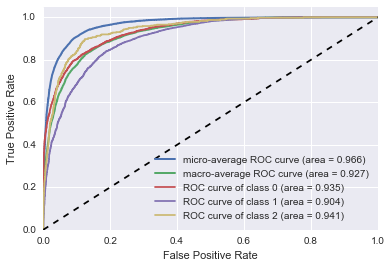

In [14]:
NN_CLF(X_train,
        y_train,
        X_test,
        y_test,
        training_epochs = training_epochs,
        batch_size = batch_size,
        display_step = display_step,
        architecture = architecture)

Batch: 0001 cost= 69.838325500

	Train Micro ROC: 0.650666153341
	Test Micro ROC: 0.65493668159

	Train Micro F1: 0.488154485956
	Test Micro F1: 0.491887101173

	Train Macro F1: 0.278443243897
	Test Macro F1: 0.282599576273

	Train Pearson Correlation:  -0.026547017105
	Test Pearson Correlation:  -0.0181727682425

	Train Spearman Correlation:  -0.0311644444328
	Test Spearman Correlation:  -0.0234255935547

	Train RMSE:  0.7490763862580038
	Test RMSE:  0.7458476576739564

	Train R^2:  -0.982252154954
	Test R^2:  -0.964425302041


Batch: 0501 cost= 37.247542546

	Train Micro ROC: 0.903505003802
	Test Micro ROC: 0.898772286428

	Train Micro F1: 0.769038041996
	Test Micro F1: 0.758794655031

	Train Macro F1: 0.521192579071
	Test Macro F1: 0.512299480281

	Train Pearson Correlation:  0.48320729518
	Test Pearson Correlation:  0.461872237058

	Train Spearman Correlation:  0.400775101088
	Test Spearman Correlation:  0.38335791978

	Train RMSE:  0.3528015443595911
	Test RMSE:  0.359891898567615

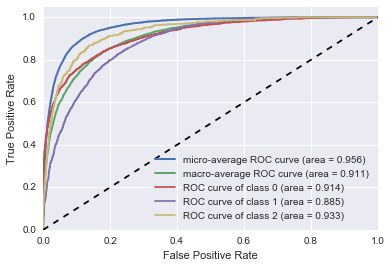

In [15]:
NN_CLF(X_train,
        y_train,
        X_test,
        y_test,
        training_epochs = training_epochs,
        batch_size = batch_size,
        display_step = display_step,
        architecture = architecture,
        one_hot = True)